<a href="https://colab.research.google.com/github/roberthouston14/Final_Praxis_Code/blob/main/BERT_Embedding_w_Traditioinal_ML_DOE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install datasets
!pip install transformers
!pip install tqdm
!pip install xgboost
!pip install lightgbm
!pip install catboost
!pip install scikit-learn seaborn xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 19.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 59.7 MB/s eta 0:00

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun May 28 14:37:09 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    49W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import psutil

# Get the current memory usage and CPU utilization
memory = psutil.virtual_memory()
cpu_usage = psutil.cpu_percent()

# Print the results
print(f"Memory usage: {memory.used / 1024 / 1024:.2f} MB")
print(f"CPU utilization: {cpu_usage}%")


Memory usage: 1463.85 MB
CPU utilization: 2.6%


In [ ]:
!nvidia-smi -L

GPU 0: NVIDIA A100-SXM4-40GB (UUID: GPU-e94b2f91-8dee-0b50-586a-f2898c7ad224)


In [ ]:
import torch

# Check if CUDA is available
if torch.cuda.is_available():
    # Get the name of the GPU device
    device = torch.cuda.get_device_name(0)
    print(f"GPU device: {device}")
else:
    print("No GPU available")

GPU device: NVIDIA A100-SXM4-40GB


This code performs a multi-class text classification task using an ensemble model that combines BERT-based embeddings with traditional machine learning models. The main steps of the code are as follows:

* Import necessary libraries and modules, including transformers for BERT, various traditional ML models, and sklearn functions for data processing and evaluation.

* Prompt the user to input the paths to the training and testing datasets, as well as the names of the columns containing text data and labels.

* Load the datasets, prepare the data, and encode the labels.
Display a list of available BERT models and traditional ML models for the user to choose from.

* Load the selected BERT tokenizer and model.

* Define a function (get_embeddings) to obtain BERT embeddings for the input text data in batches.

* Extract features for the train and test sets in smaller batches using the get_embeddings function.

* Define the ensemble model by initializing a OneVsRestClassifier with the selected traditional ML model.

* * Train and test the ensemble model using the BERT embeddings.
Print a classification report with precision, recall, F1-score, and support for each class.

* Plot a confusion matrix to visualize the performance of the ensemble model.

* Calculate the ROC curve and the macro-average ROC-AUC for each class, and plot the macro-average ROC curve.

This code allows users to easily experiment with different BERT models and traditional machine learning models to find the best ensemble model for their multi-class text classification task. The performance metrics, confusion matrix, and ROC curve provide a comprehensive evaluation of the model's performance.

Enter the path to the training data: /content/drive/MyDrive/Production Datasets/ham-spam-phishing/Traditional Databalance Datasets/Downsampled/gold_Dataset_5971_downsampled_training.csv
Enter the path to the testing data: /content/drive/MyDrive/Production Datasets/ham-spam-phishing/Traditional Databalance Datasets/Downsampled/gold_Dataset_5971_downsampled_testing.csv
Enter the column name for the text data: TEXT
Enter the column name for the labels: LABEL


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Choose a BERT model:
1. distilbert-base-uncased
2. bert-base-uncased
3. bert-large-uncased
4. roberta-base
5. roberta-large
6. albert-base-v2
7. albert-large-v2
8. microsoft/deberta-base
9. xlm-roberta-base
10. xlm-roberta-large
11. google/electra-small-discriminator
12. google/electra-base-discriminator
13. google/electra-large-discriminator
Enter the number corresponding to the desired BERT model: 12

Choose a traditional ML model:
1. DecisionTreeClassifier
2. AdaBoostClassifier
3. RandomForestClassifier
4. SVC
5. LogisticRegression
6. GaussianNB
7. KNeighborsClassifier
8. GradientBoostingClassifier
9. XGBClassifier
10. LGBMClassifier
11. CatBoostClassifier
Enter the number corresponding to the desired traditional ML model: 2
Choose a batch size from the notional ranges:
1. Small (8-32): Recommended for limited resources or slower devices.
2. Medium (64-128): Recommended for mid-range devices.
3. Large (256-512): Recommended for high-performance devices.
Enter the number correspondi

Some weights of the model checkpoint at google/electra-base-discriminator were not used when initializing ElectraModel: ['discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Do you want to fine-tune the BERT model before extracting embeddings? (y/n): y
Enter the number of epochs for fine-tuning (recommended: 2-5): 3

Choose a learning rate:
1. Small (1e-5): Recommended for large datasets or if the model is overfitting.
2. Medium (2e-5): Recommended for most cases.
3. Large (5e-5): Recommended for small datasets or if the model is underfitting.
Enter the number corresponding to the desired learning rate: 3

Choose an optimizer:
1. AdamW: Recommended for most cases.
2. Adam
3. SGD
Enter the number corresponding to the desired optimizer: 1


Fine-tuning epoch 1/3:   0%|          | 0/65 [00:00<?, ?it/s]

Epoch 1/3 Loss: 0.6492279050441888


Fine-tuning epoch 2/3:   0%|          | 0/65 [00:00<?, ?it/s]

Epoch 2/3 Loss: 0.38203647629572796


Fine-tuning epoch 3/3:   0%|          | 0/65 [00:00<?, ?it/s]

Epoch 3/3 Loss: 0.24754990729001852


Some weights of the model checkpoint at google/electra-base-discriminator were not used when initializing ElectraModel: ['discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Processing batches:   0%|          | 0/65 [00:00<?, ?it/s]

Processing batches:   0%|          | 0/14 [00:00<?, ?it/s]

Ensemble Model Progress:   0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Ensemble Classification Report:
               precision    recall  f1-score   support

         ham       0.96      0.93      0.94        73
    smishing       0.82      0.81      0.82        74
        spam       0.79      0.82      0.81        74

    accuracy                           0.86       221
   macro avg       0.86      0.86      0.86       221
weighted avg       0.86      0.86      0.86       221



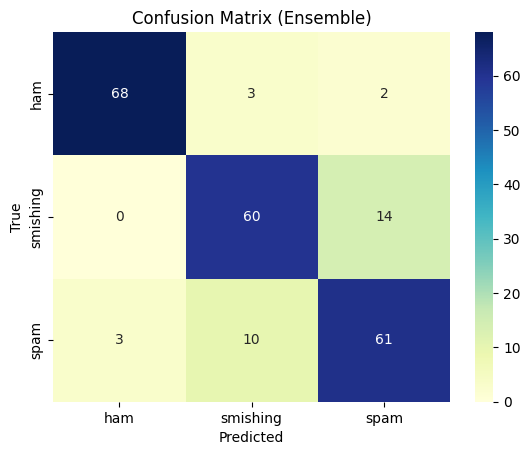

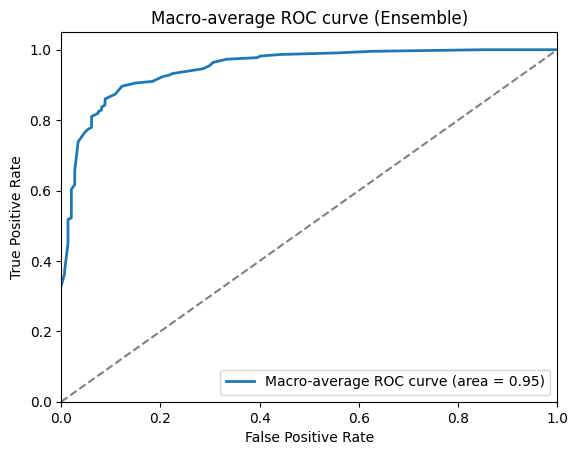

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, auc
from sklearn.preprocessing import LabelEncoder, label_binarize
import logging
from tqdm import tqdm
from tqdm.notebook import tqdm
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
from torch.nn import CrossEntropyLoss
from transformers import get_linear_schedule_with_warmup
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import MultinomialNB


%matplotlib inline

# Set the device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Prompt user for paths to train and test datasets
train_data_path = input("Enter the path to the training data: ")
test_data_path = input("Enter the path to the testing data: ")

# Load train and test data
train_data_df = pd.read_csv(train_data_path)
test_data_df = pd.read_csv(test_data_path)

# Prompt user for column names
text_column = input("Enter the column name for the text data: ")
label_column = input("Enter the column name for the labels: ")

# Prepare data
logging.debug('Preparing data...')
X_train = train_data_df[text_column]
y_train = train_data_df[label_column]
X_test = test_data_df[text_column]
y_test = test_data_df[label_column]

# Encode labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
logging.debug('Data preparation complete.')

# Define available BERT models
bert_models = [
    "distilbert-base-uncased",
    "bert-base-uncased",
    "bert-large-uncased",
    "roberta-base",
    "roberta-large",
    "albert-base-v2",
    "albert-large-v2",
    "microsoft/deberta-base",
    "xlm-roberta-base",
    "xlm-roberta-large",
    "google/electra-small-discriminator",
    "google/electra-base-discriminator",
    "google/electra-large-discriminator"
]

# Define available traditional ML models
ml_models = [
    DecisionTreeClassifier(max_depth=3),
    AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), n_estimators=100),
    RandomForestClassifier(),
    SVC(probability=True),
    LogisticRegression(max_iter=1000),
    GaussianNB(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    LGBMClassifier(),
    CatBoostClassifier(silent=True),
]

# Prompt user for BERT and ML model choices
print("\nChoose a BERT model:")
for i, model in enumerate(bert_models):
    print(f"{i + 1}. {model}")

bert_model_choice = int(input("Enter the number corresponding to the desired BERT model: ")) - 1
bert_model_name = bert_models[bert_model_choice]

print("\nChoose a traditional ML model:")
for i, model in enumerate(ml_models):
    print(f"{i + 1}. {model.__class__.__name__}")

ml_model_choice = int(input("Enter the number corresponding to the desired traditional ML model: ")) - 1
ml_model = ml_models[ml_model_choice]

# Prompt user for the desired batch size
print("Choose a batch size from the notional ranges:")
print("1. Small (8-32): Recommended for limited resources or slower devices.")
print("2. Medium (64-128): Recommended for mid-range devices.")
print("3. Large (256-512): Recommended for high-performance devices.")
batch_size_choice = int(input("Enter the number corresponding to the desired batch size range: "))

if batch_size_choice == 1:
    min_batch_size, max_batch_size = 8, 32
elif batch_size_choice == 2:
    min_batch_size, max_batch_size = 64, 128
elif batch_size_choice == 3:
    min_batch_size, max_batch_size = 256, 512
else:
    print("Invalid choice. Defaulting to medium batch size range.")
    min_batch_size, max_batch_size = 64, 128

batch_size = int(input(f"Enter the desired batch size between {min_batch_size} and {max_batch_size}: "))

class FineTuneBertClassifier(torch.nn.Module):
    def __init__(self, bert_model, num_labels):
        super(FineTuneBertClassifier, self).__init__()
        self.bert = bert_model
        self.classifier = torch.nn.Linear(bert_model.config.hidden_size, num_labels)

    def forward(self, input_ids):
        outputs = self.bert(input_ids)
        pooled_output = outputs.last_hidden_state[:, 0, :]
        logits = self.classifier(pooled_output)
        return logits

def fine_tune_bert(model, train_loader, optimizer, scheduler, epochs, device):
    loss_fn = CrossEntropyLoss()

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        with tqdm(train_loader, desc=f"Fine-tuning epoch {epoch + 1}/{epochs}") as progress_bar:
            for batch in progress_bar:
                optimizer.zero_grad()
                input_ids, labels = batch
                input_ids = input_ids.to(device)
                labels = labels.to(device)
                logits = model(input_ids)
                loss = loss_fn(logits, labels)
                loss.backward()
                optimizer.step()
                scheduler.step()

                progress_bar.set_postfix(loss=loss.item())
                total_loss += loss.item()

        print(f"Epoch {epoch + 1}/{epochs} Loss: {total_loss / len(train_loader)}")

def prepare_fine_tuning_dataset(texts, labels, tokenizer, batch_size):
    input_ids = tokenizer(texts, return_tensors="pt", padding=True, truncation=True)["input_ids"]
    dataset = TensorDataset(input_ids, torch.tensor(labels))
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    return loader



# Load selected BERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(bert_model_name)
model = AutoModel.from_pretrained(bert_model_name).to(device)
fine_tune_model = FineTuneBertClassifier(model, len(le.classes_)).to(device)

fine_tune_choice = input("Do you want to fine-tune the BERT model before extracting embeddings? (y/n): ").lower()

if fine_tune_choice == 'y':
    # Prompt user for the number of epochs
    epochs = int(input("Enter the number of epochs for fine-tuning (recommended: 2-5): "))

    # Prompt user for the learning rate
    print("\nChoose a learning rate:")
    print("1. Small (1e-5): Recommended for large datasets or if the model is overfitting.")
    print("2. Medium (2e-5): Recommended for most cases.")
    print("3. Large (5e-5): Recommended for small datasets or if the model is underfitting.")
    lr_choice = int(input("Enter the number corresponding to the desired learning rate: "))
    if lr_choice == 1:
        learning_rate = 1e-5
    elif lr_choice == 2:
        learning_rate = 2e-5
    elif lr_choice == 3:
        learning_rate = 5e-5
    else:
        print("Invalid choice. Defaulting to medium learning rate.")
        learning_rate = 2e-5

    # Prompt user for the optimizer
    print("\nChoose an optimizer:")
    print("1. AdamW: Recommended for most cases.")
    print("2. Adam")
    print("3. SGD")
    optimizer_choice = int(input("Enter the number corresponding to the desired optimizer: "))
    if optimizer_choice == 1:
        optimizer = optim.AdamW(fine_tune_model.parameters(), lr=learning_rate)
    elif optimizer_choice == 2:
        optimizer = optim.Adam(fine_tune_model.parameters(), lr=learning_rate)
    elif optimizer_choice == 3:
        optimizer = optim.SGD(fine_tune_model.parameters(), lr=learning_rate)
    else:
        print("Invalid choice. Defaulting to AdamW optimizer.")
        optimizer = optim.AdamW(fine_tune_model.parameters(), lr=learning_rate)

    # Prepare DataLoader for fine-tuning
    batch_size = 16  # Adjust the batch size based on your GPU memory
    train_loader = prepare_fine_tuning_dataset(X_train.tolist(), y_train, tokenizer, batch_size)

    # Fine-tune the model
    total_steps = len(train_loader) * epochs
    scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)
    fine_tune_bert(fine_tune_model, train_loader, optimizer, scheduler, epochs, device)

# Load selected BERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(bert_model_name)
model = AutoModel.from_pretrained(bert_model_name).to(device)

def get_embeddings(texts, batch_size=64, strategy="average"):
    embeddings = []
    n_batches = (len(texts) + batch_size - 1) // batch_size
    for i in tqdm(range(n_batches), desc="Processing batches"):
        batch = texts[i * batch_size:(i + 1) * batch_size]
        input_ids = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)["input_ids"].to(device)
        with torch.no_grad():
            batch_embeddings = model(input_ids).last_hidden_state.cpu().numpy()

        if strategy == "average":
            batch_embeddings = np.mean(batch_embeddings, axis=1)
        elif strategy == "concat":
            batch_embeddings = np.concatenate(batch_embeddings, axis=1)
        else:
            raise ValueError("Invalid strategy. Supported strategies are 'average' and 'concat'.")

        embeddings.extend(batch_embeddings)
    return np.array(embeddings)

# Extract features for train and test sets in user-specified batch size
X_train_bert = get_embeddings(X_train.tolist(), batch_size)
X_test_bert = get_embeddings(X_test.tolist(), batch_size)

# Define the ensemble model
ensemble_model = ml_model
ovr_classifier = OneVsRestClassifier(ensemble_model)

# Train and test the model
with tqdm(total=2, desc="Ensemble Model Progress") as progress_bar:
    ovr_classifier.fit(X_train_bert, y_train)
    progress_bar.update(1)  # Update the progress bar after model training
    y_pred = ovr_classifier.predict(X_test_bert)
    y_score = ovr_classifier.predict_proba(X_test_bert)
    progress_bar.update(1)  # Update the progress bar after model testing

# Print classification report
print("Ensemble Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Ensemble)")
plt.show()

# Calculate ROC curve, macro-average ROC-AUC, and plot it
y_true_bin = label_binarize(y_test, classes=range(len(le.classes_)))
n_classes = y_true_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

logging.debug('Calculating ROC curve and macro-average ROC-AUC...')
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
roc_auc_macro = np.mean([roc_auc[i] for i in range(n_classes)])
logging.debug('Plotting ROC curve...')
plt.plot(all_fpr, mean_tpr, label=f"Macro-average ROC curve (area = {roc_auc_macro:.2f})", lw=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Macro-average ROC curve (Ensemble)")
plt.legend(loc="lower right")
plt.show()
logging.debug('ROC curve plotting complete.')

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, auc
from sklearn.preprocessing import LabelEncoder, label_binarize
import logging
from tqdm import tqdm
from tqdm.notebook import tqdm
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
from torch.nn import CrossEntropyLoss
from transformers import get_linear_schedule_with_warmup
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier




%matplotlib inline

# Set the device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Prompt user for paths to train and test datasets
train_data_path = input("Enter the path to the training data: ")
test_data_path = input("Enter the path to the testing data: ")

# Load train and test data
train_data_df = pd.read_csv(train_data_path)
test_data_df = pd.read_csv(test_data_path)

# Prompt user for column names
text_column = input("Enter the column name for the text data: ")
label_column = input("Enter the column name for the labels: ")

# Prepare data
logging.debug('Preparing data...')
X_train = train_data_df[text_column]
y_train = train_data_df[label_column]
X_test = test_data_df[text_column]
y_test = test_data_df[label_column]

# Encode labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
logging.debug('Data preparation complete.')

# Define available BERT models
bert_models = [
    "distilbert-base-uncased",
    "bert-base-uncased",
    "bert-large-uncased",
    "roberta-base",
    "roberta-large",
    "albert-base-v2",
    "albert-large-v2",
    "microsoft/deberta-base",
    "xlm-roberta-base",
    "xlm-roberta-large",
    "google/electra-small-discriminator",
    "google/electra-base-discriminator",
    "google/electra-large-discriminator"
]

# Define available traditional ML models
ml_models = [
    DecisionTreeClassifier(max_depth=3),
    AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), n_estimators=100),
    RandomForestClassifier(),
    SVC(probability=True),
    LogisticRegression(max_iter=1000),
    GaussianNB(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    LGBMClassifier(),
    CatBoostClassifier(silent=True),
]

# Prompt user for BERT and ML model choices
print("\nChoose a BERT model:")
for i, model in enumerate(bert_models):
    print(f"{i + 1}. {model}")

bert_model_choice = int(input("Enter the number corresponding to the desired BERT model: ")) - 1
bert_model_name = bert_models[bert_model_choice]

print("\nChoose a traditional ML model:")
for i, model in enumerate(ml_models):
    print(f"{i + 1}. {model.__class__.__name__}")

ml_model_choice = int(input("Enter the number corresponding to the desired traditional ML model: ")) - 1
ml_model = ml_models[ml_model_choice]

# Prompt user for the desired batch size
print("Choose a batch size from the notional ranges:")
print("1. Small (8-32): Recommended for limited resources or slower devices.")
print("2. Medium (64-128): Recommended for mid-range devices.")
print("3. Large (256-512): Recommended for high-performance devices.")
batch_size_choice = int(input("Enter the number corresponding to the desired batch size range: "))

if batch_size_choice == 1:
    min_batch_size, max_batch_size = 8, 32
elif batch_size_choice == 2:
    min_batch_size, max_batch_size = 64, 128
elif batch_size_choice == 3:
    min_batch_size, max_batch_size = 256, 512
else:
    print("Invalid choice. Defaulting to medium batch size range.")
    min_batch_size, max_batch_size = 64, 128

batch_size = int(input(f"Enter the desired batch size between {min_batch_size} and {max_batch_size}: "))

class FineTuneBertClassifier(torch.nn.Module):
    def __init__(self, bert_model, num_labels):
        super(FineTuneBertClassifier, self).__init__()
        self.bert = bert_model
        self.classifier = torch.nn.Linear(bert_model.config.hidden_size, num_labels)

    def forward(self, input_ids):
        outputs = self.bert(input_ids)
        pooled_output = outputs.last_hidden_state[:, 0, :]
        logits = self.classifier(pooled_output)
        return logits

def fine_tune_bert(model, train_loader, optimizer, scheduler, epochs, device):
    loss_fn = CrossEntropyLoss()

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        with tqdm(train_loader, desc=f"Fine-tuning epoch {epoch + 1}/{epochs}") as progress_bar:
            for batch in progress_bar:
                optimizer.zero_grad()
                input_ids, labels = batch
                input_ids = input_ids.to(device)
                labels = labels.to(device)
                logits = model(input_ids)
                loss = loss_fn(logits, labels)
                loss.backward()
                optimizer.step()
                scheduler.step()

                progress_bar.set_postfix(loss=loss.item())
                total_loss += loss.item()

        print(f"Epoch {epoch + 1}/{epochs} Loss: {total_loss / len(train_loader)}")

def prepare_fine_tuning_dataset(texts, labels, tokenizer, batch_size):
    input_ids = tokenizer(texts, return_tensors="pt", padding=True, truncation=True)["input_ids"]
    dataset = TensorDataset(input_ids, torch.tensor(labels))
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    return loader



# Load selected BERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(bert_model_name)
model = AutoModel.from_pretrained(bert_model_name).to(device)
fine_tune_model = FineTuneBertClassifier(model, len(le.classes_)).to(device)

fine_tune_choice = input("Do you want to fine-tune the BERT model before extracting embeddings? (y/n): ").lower()

if fine_tune_choice == 'y':
    # Prompt user for the number of epochs
    epochs = int(input("Enter the number of epochs for fine-tuning (recommended: 2-5): "))

    # Prompt user for the learning rate
    print("\nChoose a learning rate:")
    print("1. Small (1e-5): Recommended for large datasets or if the model is overfitting.")
    print("2. Medium (2e-5): Recommended for most cases.")
    print("3. Large (5e-5): Recommended for small datasets or if the model is underfitting.")
    lr_choice = int(input("Enter the number corresponding to the desired learning rate: "))
    if lr_choice == 1:
        learning_rate = 1e-5
    elif lr_choice == 2:
        learning_rate = 2e-5
    elif lr_choice == 3:
        learning_rate = 5e-5
    else:
        print("Invalid choice. Defaulting to medium learning rate.")
        learning_rate = 2e-5

    # Prompt user for the optimizer
    print("\nChoose an optimizer:")
    print("1. AdamW: Recommended for most cases.")
    print("2. Adam")
    print("3. SGD")
    optimizer_choice = int(input("Enter the number corresponding to the desired optimizer: "))
    if optimizer_choice == 1:
        optimizer = optim.AdamW(fine_tune_model.parameters(), lr=learning_rate)
    elif optimizer_choice == 2:
        optimizer = optim.Adam(fine_tune_model.parameters(), lr=learning_rate)
    elif optimizer_choice == 3:
        optimizer = optim.SGD(fine_tune_model.parameters(), lr=learning_rate)
    else:
        print("Invalid choice. Defaulting to AdamW optimizer.")
        optimizer = optim.AdamW(fine_tune_model.parameters(), lr=learning_rate)

    # Prepare DataLoader for fine-tuning
    batch_size = 16  # Adjust the batch size based on your GPU memory
    train_loader = prepare_fine_tuning_dataset(X_train.tolist(), y_train, tokenizer, batch_size)

    # Fine-tune the model
    total_steps = len(train_loader) * epochs
    scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)
    fine_tune_bert(fine_tune_model, train_loader, optimizer, scheduler, epochs, device)

# Load selected BERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(bert_model_name)
model = AutoModel.from_pretrained(bert_model_name).to(device)

def get_embeddings(texts, batch_size=64, strategy="average"):
    embeddings = []
    n_batches = (len(texts) + batch_size - 1) // batch_size
    for i in tqdm(range(n_batches), desc="Processing batches"):
        batch = texts[i * batch_size:(i + 1) * batch_size]
        input_ids = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)["input_ids"].to(device)
        with torch.no_grad():
            batch_embeddings = model(input_ids).last_hidden_state.cpu().numpy()

        if strategy == "average":
            batch_embeddings = np.mean(batch_embeddings, axis=1)
        elif strategy == "concat":
            batch_embeddings = np.concatenate(batch_embeddings, axis=1)
        else:
            raise ValueError("Invalid strategy. Supported strategies are 'average' and 'concat'.")

        embeddings.extend(batch_embeddings)
    return np.array(embeddings)

# Extract features for train and test sets in user-specified batch size
X_train_bert = get_embeddings(X_train.tolist(), batch_size)
X_test_bert = get_embeddings(X_test.tolist(), batch_size)

# Define the ensemble model
ensemble_model = ml_model
ovr_classifier = OneVsRestClassifier(ensemble_model)

# Train and test the model
with tqdm(total=2, desc="Ensemble Model Progress") as progress_bar:
    ovr_classifier.fit(X_train_bert, y_train)
    progress_bar.update(1)  # Update the progress bar after model training
    y_pred = ovr_classifier.predict(X_test_bert)
    y_score = ovr_classifier.predict_proba(X_test_bert)
    progress_bar.update(1)  # Update the progress bar after model testing

# Print classification report
print("Ensemble Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Ensemble)")
plt.show()

# Calculate ROC curve, macro-average ROC-AUC, and plot it
y_true_bin = label_binarize(y_test, classes=range(len(le.classes_)))
n_classes = y_true_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

logging.debug('Calculating ROC curve and macro-average ROC-AUC...')
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
roc_auc_macro = np.mean([roc_auc[i] for i in range(n_classes)])
logging.debug('Plotting ROC curve...')
plt.plot(all_fpr, mean_tpr, label=f"Macro-average ROC curve (area = {roc_auc_macro:.2f})", lw=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Macro-average ROC curve (Ensemble)")
plt.legend(loc="lower right")
plt.show()
logging.debug('ROC curve plotting complete.')

KeyboardInterrupt: ignored

In [ ]:
#User Prompted inputs
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, auc
from sklearn.preprocessing import LabelEncoder, label_binarize
import logging
from tqdm import tqdm
from tqdm.notebook import tqdm
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
from torch.nn import CrossEntropyLoss
from transformers import get_linear_schedule_with_warmup
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier




%matplotlib inline

# Set the device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Prompt user for paths to train and test datasets
train_data_path = input("Enter the path to the training data: ")
test_data_path = input("Enter the path to the testing data: ")

# Load train and test data
train_data_df = pd.read_csv(train_data_path)
test_data_df = pd.read_csv(test_data_path)

# Prompt user for column names
text_column = input("Enter the column name for the text data: ")
label_column = input("Enter the column name for the labels: ")

# Prepare data
logging.debug('Preparing data...')
X_train = train_data_df[text_column]
y_train = train_data_df[label_column]
X_test = test_data_df[text_column]
y_test = test_data_df[label_column]

# Encode labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
logging.debug('Data preparation complete.')

# Define available BERT models
bert_models = [
    "distilbert-base-uncased",
    "bert-base-uncased",
    "bert-large-uncased",
    "roberta-base",
    "roberta-large",
    "albert-base-v2",
    "albert-large-v2",
    "microsoft/deberta-base",
    "xlm-roberta-base",
    "xlm-roberta-large",
    "google/electra-small-discriminator",
    "google/electra-base-discriminator",
    "google/electra-large-discriminator"
]

# Define available traditional ML models
ml_models = [
    DecisionTreeClassifier(max_depth=3),
    AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), n_estimators=100),
    RandomForestClassifier(),
    SVC(probability=True),
    LogisticRegression(max_iter=1000),
    GaussianNB(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    LGBMClassifier(),
    CatBoostClassifier(silent=True),
]

# Prompt user for BERT and ML model choices
print("\nChoose a BERT model:")
for i, model in enumerate(bert_models):
    print(f"{i + 1}. {model}")

bert_model_choice = int(input("Enter the number corresponding to the desired BERT model: ")) - 1
bert_model_name = bert_models[bert_model_choice]

print("\nChoose a traditional ML model:")
for i, model in enumerate(ml_models):
    print(f"{i + 1}. {model.__class__.__name__}")

ml_model_choice = int(input("Enter the number corresponding to the desired traditional ML model: ")) - 1
ml_model = ml_models[ml_model_choice]

# Prompt user for the desired batch size
print("Choose a batch size from the notional ranges:")
print("1. Small (8-32): Recommended for limited resources or slower devices.")
print("2. Medium (64-128): Recommended for mid-range devices.")
print("3. Large (256-512): Recommended for high-performance devices.")
batch_size_choice = int(input("Enter the number corresponding to the desired batch size range: "))

if batch_size_choice == 1:
    min_batch_size, max_batch_size = 8, 32
elif batch_size_choice == 2:
    min_batch_size, max_batch_size = 64, 128
elif batch_size_choice == 3:
    min_batch_size, max_batch_size = 256, 512
else:
    print("Invalid choice. Defaulting to medium batch size range.")
    min_batch_size, max_batch_size = 64, 128

batch_size = int(input(f"Enter the desired batch size between {min_batch_size} and {max_batch_size}: "))

class FineTuneBertClassifier(torch.nn.Module):
    def __init__(self, bert_model, num_labels):
        super(FineTuneBertClassifier, self).__init__()
        self.bert = bert_model
        self.classifier = torch.nn.Linear(bert_model.config.hidden_size, num_labels)

    def forward(self, input_ids):
        outputs = self.bert(input_ids)
        pooled_output = outputs.last_hidden_state[:, 0, :]
        logits = self.classifier(pooled_output)
        return logits

def fine_tune_bert(model, train_loader, optimizer, scheduler, epochs, device):
    loss_fn = CrossEntropyLoss()

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        with tqdm(train_loader, desc=f"Fine-tuning epoch {epoch + 1}/{epochs}") as progress_bar:
            for batch in progress_bar:
                optimizer.zero_grad()
                input_ids, labels = batch
                input_ids = input_ids.to(device)
                labels = labels.to(device)
                logits = model(input_ids)
                loss = loss_fn(logits, labels)
                loss.backward()
                optimizer.step()
                scheduler.step()

                progress_bar.set_postfix(loss=loss.item())
                total_loss += loss.item()

        print(f"Epoch {epoch + 1}/{epochs} Loss: {total_loss / len(train_loader)}")

def prepare_fine_tuning_dataset(texts, labels, tokenizer, batch_size):
    input_ids = tokenizer(texts, return_tensors="pt", padding=True, truncation=True)["input_ids"]
    dataset = TensorDataset(input_ids, torch.tensor(labels))
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    return loader



# Load selected BERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(bert_model_name)
model = AutoModel.from_pretrained(bert_model_name).to(device)
fine_tune_model = FineTuneBertClassifier(model, len(le.classes_)).to(device)

fine_tune_choice = input("Do you want to fine-tune the BERT model before extracting embeddings? (y/n): ").lower()

if fine_tune_choice == 'y':
    # Prompt user for the number of epochs
    epochs = int(input("Enter the number of epochs for fine-tuning (recommended: 2-5): "))

    # Prompt user for the learning rate
    print("\nChoose a learning rate:")
    print("1. Small (1e-5): Recommended for large datasets or if the model is overfitting.")
    print("2. Medium (2e-5): Recommended for most cases.")
    print("3. Large (5e-5): Recommended for small datasets or if the model is underfitting.")
    lr_choice = int(input("Enter the number corresponding to the desired learning rate: "))
    if lr_choice == 1:
        learning_rate = 1e-5
    elif lr_choice == 2:
        learning_rate = 2e-5
    elif lr_choice == 3:
        learning_rate = 5e-5
    else:
        print("Invalid choice. Defaulting to medium learning rate.")
        learning_rate = 2e-5

    # Prompt user for the optimizer
    print("\nChoose an optimizer:")
    print("1. AdamW: Recommended for most cases.")
    print("2. Adam")
    print("3. SGD")
    optimizer_choice = int(input("Enter the number corresponding to the desired optimizer: "))
    if optimizer_choice == 1:
        optimizer = optim.AdamW(fine_tune_model.parameters(), lr=learning_rate)
    elif optimizer_choice == 2:
        optimizer = optim.Adam(fine_tune_model.parameters(), lr=learning_rate)
    elif optimizer_choice == 3:
        optimizer = optim.SGD(fine_tune_model.parameters(), lr=learning_rate)
    else:
        print("Invalid choice. Defaulting to AdamW optimizer.")
        optimizer = optim.AdamW(fine_tune_model.parameters(), lr=learning_rate)

    # Prepare DataLoader for fine-tuning
    batch_size = 16  # Adjust the batch size based on your GPU memory
    train_loader = prepare_fine_tuning_dataset(X_train.tolist(), y_train, tokenizer, batch_size)

    # Fine-tune the model
    total_steps = len(train_loader) * epochs
    scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)
    fine_tune_bert(fine_tune_model, train_loader, optimizer, scheduler, epochs, device)

# Load selected BERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(bert_model_name)
model = AutoModel.from_pretrained(bert_model_name).to(device)

def get_embeddings(texts, batch_size=64, strategy="average"):
    embeddings = []
    n_batches = (len(texts) + batch_size - 1) // batch_size
    for i in tqdm(range(n_batches), desc="Processing batches"):
        batch = texts[i * batch_size:(i + 1) * batch_size]
        input_ids = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)["input_ids"].to(device)
        with torch.no_grad():
            batch_embeddings = model(input_ids).last_hidden_state.cpu().numpy()

        if strategy == "average":
            batch_embeddings = np.mean(batch_embeddings, axis=1)
        elif strategy == "concat":
            batch_embeddings = np.concatenate(batch_embeddings, axis=1)
        else:
            raise ValueError("Invalid strategy. Supported strategies are 'average' and 'concat'.")

        embeddings.extend(batch_embeddings)
    return np.array(embeddings)

# Extract features for train and test sets in user-specified batch size
X_train_bert = get_embeddings(X_train.tolist(), batch_size)
X_test_bert = get_embeddings(X_test.tolist(), batch_size)

# Define the ensemble model
ensemble_model = ml_model
ovr_classifier = OneVsRestClassifier(ensemble_model)

# Train and test the model
with tqdm(total=2, desc="Ensemble Model Progress") as progress_bar:
    ovr_classifier.fit(X_train_bert, y_train)
    progress_bar.update(1)  # Update the progress bar after model training
    y_pred = ovr_classifier.predict(X_test_bert)
    y_score = ovr_classifier.predict_proba(X_test_bert)
    progress_bar.update(1)  # Update the progress bar after model testing

# Print classification report
classification_dict = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
print("Ensemble Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Extract F1-scores
spam_f1 = classification_dict['spam']['f1-score']
smishing_f1 = classification_dict['smishing']['f1-score']
ham_f1 = classification_dict['ham']['f1-score']

# Calculate aggregate score
aggregate_score = (spam_f1 * 2 + smishing_f1 * 3 + ham_f1) / 6
print(f'Aggregate score: {aggregate_score}')

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Ensemble)")
plt.show()

# Calculate ROC curve, macro-average ROC-AUC, and plot it
y_true_bin = label_binarize(y_test, classes=range(len(le.classes_)))
n_classes = y_true_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

logging.debug('Calculating ROC curve and macro-average ROC-AUC...')
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
roc_auc_macro = np.mean([roc_auc[i] for i in range(n_classes)])
logging.debug('Plotting ROC curve...')
plt.plot(all_fpr, mean_tpr, label=f"Macro-average ROC curve (area = {roc_auc_macro:.2f})", lw=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Macro-average ROC curve (Ensemble)")
plt.legend(loc="lower right")
plt.show()
logging.debug('ROC curve plotting complete.')

# Create an empty DataFrame for storing performance metrics
performance_metrics = pd.DataFrame(columns=['Model', 'Accuracy', 'ham Precision', 'ham Recall', 'ham F1-score', 'smishing Precision', 'smishing Recall', 'smishing F1-score', 'spam Precision', 'spam Recall', 'spam F1-score', 'Aggregate Score'])

# Compute accuracy
accuracy = np.sum(y_test == y_pred) / len(y_test)

# Extract precision, recall, and F1-score for each class
ham_precision = classification_dict['ham']['precision']
ham_recall = classification_dict['ham']['recall']
ham_f1 = classification_dict['ham']['f1-score']

smishing_precision = classification_dict['smishing']['precision']
smishing_recall = classification_dict['smishing']['recall']
smishing_f1 = classification_dict['smishing']['f1-score']

spam_precision = classification_dict['spam']['precision']
spam_recall = classification_dict['spam']['recall']
spam_f1 = classification_dict['spam']['f1-score']

# Append the metrics of the current model to the DataFrame
performance_metrics = performance_metrics.append({
    'Model': ml_model.__class__.__name__,
    'Accuracy': accuracy,
    'ham Precision': ham_precision,
    'ham Recall': ham_recall,
    'ham F1-score': ham_f1,
    'smishing Precision': smishing_precision,
    'smishing Recall': smishing_recall,
    'smishing F1-score': smishing_f1,
    'spam Precision': spam_precision,
    'spam Recall': spam_recall,
    'spam F1-score': spam_f1,
    'Aggregate Score': aggregate_score
}, ignore_index=True)

# Print the performance metrics DataFrame
print(performance_metrics)

# Save the DataFrame as a CSV file in the same directory as the training data
table_file_name = train_data_path.rsplit('.', 1)[0] + f'_table_BERT_Encoded_{bert_model_name.replace("/", "_")}.csv'
performance_metrics.to_csv(table_file_name, index=False)
print(f"Performance metrics table saved as '{table_file_name}'.")


ModuleNotFoundError: ignored

Enter the path to the training data: /content/drive/MyDrive/Production Datasets/1_Praxis_Dataset/DeDuped_Dataset/Split Dataset/Training Data/Generative Transformer Balanced Datasets/GPT2 Large/Dataset_5971_deduped_training_balanced_data_10149_gpt2-large_temp0.5.csv
Enter the path to the testing data: /content/drive/MyDrive/Production Datasets/1_Praxis_Dataset/DeDuped_Dataset/Split Dataset/Test & Validata Data/Dataset_5971_deduped_testing.csv
Enter the column name for the text data: TEXT
Enter the column name for the labels: LABEL


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Choose a BERT model:
1. distilbert-base-uncased
2. bert-base-uncased
3. bert-large-uncased
4. roberta-base
5. roberta-large
6. albert-base-v2
7. albert-large-v2
8. microsoft/deberta-base
9. xlm-roberta-base
10. xlm-roberta-large
11. google/electra-small-discriminator
12. google/electra-base-discriminator
13. google/electra-large-discriminator
Enter the number corresponding to the desired BERT model: 1

Choose a traditional ML model:
1. DecisionTreeClassifier
2. AdaBoostClassifier
3. RandomForestClassifier
4. SVC
5. LogisticRegression
6. GaussianNB
7. KNeighborsClassifier
8. GradientBoostingClassifier
9. XGBClassifier
10. LGBMClassifier
11. CatBoostClassifier
Enter the number corresponding to the desired traditional ML model: 5
Choose a batch size from the notional ranges:
1. Small (8-32): Recommended for limited resources or slower devices.
2. Medium (64-128): Recommended for mid-range devices.
3. Large (256-512): Recommended for high-performance devices.
Enter the number correspondin

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Do you want to fine-tune the BERT model before extracting embeddings? (y/n): y
Enter the number of epochs for fine-tuning (recommended: 2-5): 3

Choose a learning rate:
1. Small (1e-5): Recommended for large datasets or if the model is overfitting.
2. Medium (2e-5): Recommended for most cases.
3. Large (5e-5): Recommended for small datasets or if the model is underfitting.
Enter the number corresponding to the desired learning rate: 2

Choose an optimizer:
1. AdamW: Recommended for most cases.
2. Adam
3. SGD
Enter the number corresponding to the desired optimizer: 1


Fine-tuning epoch 1/3:   0%|          | 0/634 [00:00<?, ?it/s]

Epoch 1/3 Loss: 0.2263384286633014


Fine-tuning epoch 2/3:   0%|          | 0/634 [00:00<?, ?it/s]

Epoch 2/3 Loss: 0.056325796549796046


Fine-tuning epoch 3/3:   0%|          | 0/634 [00:00<?, ?it/s]

Epoch 3/3 Loss: 0.025408784772948088


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Processing batches:   0%|          | 0/634 [00:00<?, ?it/s]

Processing batches:   0%|          | 0/56 [00:00<?, ?it/s]

Ensemble Model Progress:   0%|          | 0/2 [00:00<?, ?it/s]

Ensemble Classification Report:
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99       726
    smishing       0.76      0.77      0.76        94
        spam       0.67      0.66      0.66        73

    accuracy                           0.94       893
   macro avg       0.81      0.81      0.81       893
weighted avg       0.94      0.94      0.94       893

Aggregate score: 0.7673904291459152


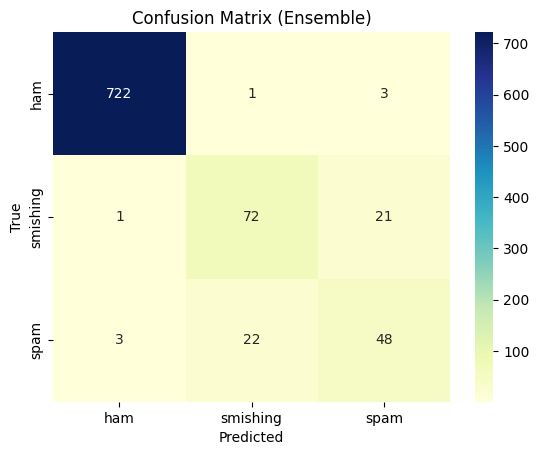

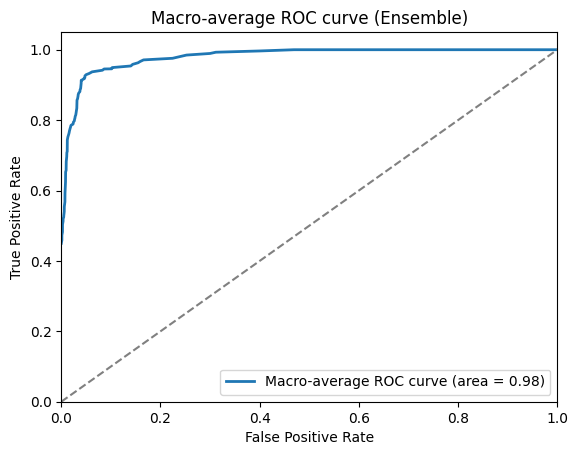

                Model  Accuracy  ham Precision  ham Recall  ham F1-score  \
0  LogisticRegression  0.942889        0.99449     0.99449       0.99449   

   smishing Precision  smishing Recall  smishing F1-score  spam Precision  \
0            0.757895         0.765957           0.761905        0.666667   

   spam Recall  spam F1-score  Aggregate Score  
0     0.657534       0.662069          0.76739  
Performance metrics table saved as '/content/drive/MyDrive/Production Datasets/1_Praxis_Dataset/DeDuped_Dataset/Split Dataset/Training Data/Generative Transformer Balanced Datasets/GPT2 Large/Dataset_5971_deduped_training_balanced_data_10149_gpt2-large_temp0.5_table_BERT_Encoded_distilbert-base-uncased.csv'.


<ipython-input-3-aa2ead3d8cb3>:337: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_metrics = performance_metrics.append({


In [ ]:
#User Selectable Options
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, auc
from sklearn.preprocessing import LabelEncoder, label_binarize
import logging
from tqdm import tqdm
from tqdm.notebook import tqdm
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
from torch.nn import CrossEntropyLoss
from transformers import get_linear_schedule_with_warmup
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier




%matplotlib inline

# Set the device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Prompt user for paths to train and test datasets
train_data_path = input("Enter the path to the training data: ")
test_data_path = input("Enter the path to the testing data: ")

# Load train and test data
train_data_df = pd.read_csv(train_data_path)
test_data_df = pd.read_csv(test_data_path)

# Prompt user for column names
text_column = input("Enter the column name for the text data: ")
label_column = input("Enter the column name for the labels: ")

# Prepare data
logging.debug('Preparing data...')
X_train = train_data_df[text_column]
y_train = train_data_df[label_column]
X_test = test_data_df[text_column]
y_test = test_data_df[label_column]

# Encode labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
logging.debug('Data preparation complete.')

# Define available BERT models
bert_models = [
    "distilbert-base-uncased",
    "bert-base-uncased",
    "bert-large-uncased",
    "roberta-base",
    "roberta-large",
    "albert-base-v2",
    "albert-large-v2",
    "microsoft/deberta-base",
    "xlm-roberta-base",
    "xlm-roberta-large",
    "google/electra-small-discriminator",
    "google/electra-base-discriminator",
    "google/electra-large-discriminator"
]

# Define available traditional ML models
ml_models = [
    DecisionTreeClassifier(max_depth=3),
    AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), n_estimators=100),
    RandomForestClassifier(),
    SVC(probability=True),
    LogisticRegression(max_iter=1000),
    GaussianNB(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    LGBMClassifier(),
    CatBoostClassifier(silent=True),
]

# Prompt user for BERT and ML model choices
print("\nChoose a BERT model:")
for i, model in enumerate(bert_models):
    print(f"{i + 1}. {model}")

bert_model_choice = int(input("Enter the number corresponding to the desired BERT model: ")) - 1
bert_model_name = bert_models[bert_model_choice]

print("\nChoose a traditional ML model:")
for i, model in enumerate(ml_models):
    print(f"{i + 1}. {model.__class__.__name__}")

ml_model_choice = int(input("Enter the number corresponding to the desired traditional ML model: ")) - 1
ml_model = ml_models[ml_model_choice]

# Prompt user for the desired batch size
print("Choose a batch size from the notional ranges:")
print("1. Small (8-32): Recommended for limited resources or slower devices.")
print("2. Medium (64-128): Recommended for mid-range devices.")
print("3. Large (256-512): Recommended for high-performance devices.")
batch_size_choice = int(input("Enter the number corresponding to the desired batch size range: "))

if batch_size_choice == 1:
    min_batch_size, max_batch_size = 8, 32
elif batch_size_choice == 2:
    min_batch_size, max_batch_size = 64, 128
elif batch_size_choice == 3:
    min_batch_size, max_batch_size = 256, 512
else:
    print("Invalid choice. Defaulting to medium batch size range.")
    min_batch_size, max_batch_size = 64, 128

batch_size = int(input(f"Enter the desired batch size between {min_batch_size} and {max_batch_size}: "))

class FineTuneBertClassifier(torch.nn.Module):
    def __init__(self, bert_model, num_labels):
        super(FineTuneBertClassifier, self).__init__()
        self.bert = bert_model
        self.classifier = torch.nn.Linear(bert_model.config.hidden_size, num_labels)

    def forward(self, input_ids):
        outputs = self.bert(input_ids)
        pooled_output = outputs.last_hidden_state[:, 0, :]
        logits = self.classifier(pooled_output)
        return logits

def fine_tune_bert(model, train_loader, optimizer, scheduler, epochs, device):
    loss_fn = CrossEntropyLoss()

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        with tqdm(train_loader, desc=f"Fine-tuning epoch {epoch + 1}/{epochs}") as progress_bar:
            for batch in progress_bar:
                optimizer.zero_grad()
                input_ids, labels = batch
                input_ids = input_ids.to(device)
                labels = labels.to(device)
                logits = model(input_ids)
                loss = loss_fn(logits, labels)
                loss.backward()
                optimizer.step()
                scheduler.step()

                progress_bar.set_postfix(loss=loss.item())
                total_loss += loss.item()

        print(f"Epoch {epoch + 1}/{epochs} Loss: {total_loss / len(train_loader)}")

def prepare_fine_tuning_dataset(texts, labels, tokenizer, batch_size):
    input_ids = tokenizer(texts, return_tensors="pt", padding=True, truncation=True)["input_ids"]
    dataset = TensorDataset(input_ids, torch.tensor(labels))
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    return loader



# Load selected BERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(bert_model_name)
model = AutoModel.from_pretrained(bert_model_name).to(device)
fine_tune_model = FineTuneBertClassifier(model, len(le.classes_)).to(device)

fine_tune_choice = input("Do you want to fine-tune the BERT model before extracting embeddings? (y/n): ").lower()

if fine_tune_choice == 'y':
    # Prompt user for the number of epochs
    epochs = int(input("Enter the number of epochs for fine-tuning (recommended: 2-5): "))

    # Prompt user for the learning rate
    print("\nChoose a learning rate:")
    print("1. Small (1e-5): Recommended for large datasets or if the model is overfitting.")
    print("2. Medium (2e-5): Recommended for most cases.")
    print("3. Large (5e-5): Recommended for small datasets or if the model is underfitting.")
    lr_choice = int(input("Enter the number corresponding to the desired learning rate: "))
    if lr_choice == 1:
        learning_rate = 1e-5
    elif lr_choice == 2:
        learning_rate = 2e-5
    elif lr_choice == 3:
        learning_rate = 5e-5
    else:
        print("Invalid choice. Defaulting to medium learning rate.")
        learning_rate = 2e-5

    # Prompt user for the optimizer
    print("\nChoose an optimizer:")
    print("1. AdamW: Recommended for most cases.")
    print("2. Adam")
    print("3. SGD")
    optimizer_choice = int(input("Enter the number corresponding to the desired optimizer: "))
    if optimizer_choice == 1:
        optimizer = optim.AdamW(fine_tune_model.parameters(), lr=learning_rate)
    elif optimizer_choice == 2:
        optimizer = optim.Adam(fine_tune_model.parameters(), lr=learning_rate)
    elif optimizer_choice == 3:
        optimizer = optim.SGD(fine_tune_model.parameters(), lr=learning_rate)
    else:
        print("Invalid choice. Defaulting to AdamW optimizer.")
        optimizer = optim.AdamW(fine_tune_model.parameters(), lr=learning_rate)

    # Prepare DataLoader for fine-tuning
    batch_size = 16  # Adjust the batch size based on your GPU memory
    train_loader = prepare_fine_tuning_dataset(X_train.tolist(), y_train, tokenizer, batch_size)

    # Fine-tune the model
    total_steps = len(train_loader) * epochs
    scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)
    fine_tune_bert(fine_tune_model, train_loader, optimizer, scheduler, epochs, device)

# Load selected BERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(bert_model_name)
model = AutoModel.from_pretrained(bert_model_name).to(device)

def get_embeddings(texts, batch_size=64, strategy="average"):
    embeddings = []
    n_batches = (len(texts) + batch_size - 1) // batch_size
    for i in tqdm(range(n_batches), desc="Processing batches"):
        batch = texts[i * batch_size:(i + 1) * batch_size]
        input_ids = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)["input_ids"].to(device)
        with torch.no_grad():
            batch_embeddings = model(input_ids).last_hidden_state.cpu().numpy()

        if strategy == "average":
            batch_embeddings = np.mean(batch_embeddings, axis=1)
        elif strategy == "concat":
            batch_embeddings = np.concatenate(batch_embeddings, axis=1)
        else:
            raise ValueError("Invalid strategy. Supported strategies are 'average' and 'concat'.")

        embeddings.extend(batch_embeddings)
    return np.array(embeddings)

# Extract features for train and test sets in user-specified batch size
X_train_bert = get_embeddings(X_train.tolist(), batch_size)
X_test_bert = get_embeddings(X_test.tolist(), batch_size)

# Define the ensemble model
ensemble_model = ml_model
ovr_classifier = OneVsRestClassifier(ensemble_model)

# Train and test the model
with tqdm(total=2, desc="Ensemble Model Progress") as progress_bar:
    ovr_classifier.fit(X_train_bert, y_train)
    progress_bar.update(1)  # Update the progress bar after model training
    y_pred = ovr_classifier.predict(X_test_bert)
    y_score = ovr_classifier.predict_proba(X_test_bert)
    progress_bar.update(1)  # Update the progress bar after model testing

# Print classification report
classification_dict = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
print("Ensemble Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Extract F1-scores
spam_f1 = classification_dict['spam']['f1-score']
smishing_f1 = classification_dict['smishing']['f1-score']
ham_f1 = classification_dict['ham']['f1-score']

# Calculate aggregate score
aggregate_score = (spam_f1 * 2 + smishing_f1 * 3 + ham_f1) / 6
print(f'Aggregate score: {aggregate_score}')

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Ensemble)")
plt.show()

# Calculate ROC curve, macro-average ROC-AUC, and plot it
y_true_bin = label_binarize(y_test, classes=range(len(le.classes_)))
n_classes = y_true_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

logging.debug('Calculating ROC curve and macro-average ROC-AUC...')
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
roc_auc_macro = np.mean([roc_auc[i] for i in range(n_classes)])
logging.debug('Plotting ROC curve...')
plt.plot(all_fpr, mean_tpr, label=f"Macro-average ROC curve (area = {roc_auc_macro:.2f})", lw=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Macro-average ROC curve (Ensemble)")
plt.legend(loc="lower right")
plt.show()
logging.debug('ROC curve plotting complete.')

# Create an empty DataFrame for storing performance metrics
performance_metrics = pd.DataFrame(columns=['Model', 'Accuracy', 'ham Precision', 'ham Recall', 'ham F1-score', 'smishing Precision', 'smishing Recall', 'smishing F1-score', 'spam Precision', 'spam Recall', 'spam F1-score', 'Aggregate Score'])

# Compute accuracy
accuracy = np.sum(y_test == y_pred) / len(y_test)

# Extract precision, recall, and F1-score for each class
ham_precision = classification_dict['ham']['precision']
ham_recall = classification_dict['ham']['recall']
ham_f1 = classification_dict['ham']['f1-score']

smishing_precision = classification_dict['smishing']['precision']
smishing_recall = classification_dict['smishing']['recall']
smishing_f1 = classification_dict['smishing']['f1-score']

spam_precision = classification_dict['spam']['precision']
spam_recall = classification_dict['spam']['recall']
spam_f1 = classification_dict['spam']['f1-score']

# Append the metrics of the current model to the DataFrame
performance_metrics = performance_metrics.append({
    'Model': ml_model.__class__.__name__,
    'Accuracy': accuracy,
    'ham Precision': ham_precision,
    'ham Recall': ham_recall,
    'ham F1-score': ham_f1,
    'smishing Precision': smishing_precision,
    'smishing Recall': smishing_recall,
    'smishing F1-score': smishing_f1,
    'spam Precision': spam_precision,
    'spam Recall': spam_recall,
    'spam F1-score': spam_f1,
    'Aggregate Score': aggregate_score
}, ignore_index=True)

# Print the performance metrics DataFrame
print(performance_metrics)

# Save the DataFrame as a CSV file in the same directory as the training data
table_file_name = train_data_path.rsplit('.', 1)[0] + f'_table_BERT_Encoded_{bert_model_name.replace("/", "_")}.csv'
performance_metrics.to_csv(table_file_name, index=False)
print(f"Performance metrics table saved as '{table_file_name}'.")

In [ ]:
#Hardcoded user preferences
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, auc
from sklearn.preprocessing import LabelEncoder, label_binarize
import logging
from tqdm import tqdm
from tqdm.notebook import tqdm
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
from torch.nn import CrossEntropyLoss
from transformers import get_linear_schedule_with_warmup
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier




%matplotlib inline

# Set the device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Prompt user for paths to train and test datasets
train_data_path = input("Enter the path to the training data: ")
test_data_path = input("Enter the path to the testing data: ")

# Load train and test data
train_data_df = pd.read_csv(train_data_path)
test_data_df = pd.read_csv(test_data_path)

# Prompt user for column names
text_column = input("Enter the column name for the text data: ")
label_column = input("Enter the column name for the labels: ")

# Prepare data
logging.debug('Preparing data...')
X_train = train_data_df[text_column]
y_train = train_data_df[label_column]
X_test = test_data_df[text_column]
y_test = test_data_df[label_column]

# Encode labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
logging.debug('Data preparation complete.')

# Define available BERT models
bert_models = [
    "distilbert-base-uncased",
    "bert-base-uncased",
    "bert-large-uncased",
    "roberta-base",
    "roberta-large",
    "albert-base-v2",
    "albert-large-v2",
    "microsoft/deberta-base",
    "xlm-roberta-base",
    "xlm-roberta-large",
    "google/electra-small-discriminator",
    "google/electra-base-discriminator",
    "google/electra-large-discriminator"
]

# Define available traditional ML models
ml_models = [
    DecisionTreeClassifier(max_depth=3),
    AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), n_estimators=100),
    RandomForestClassifier(),
    SVC(probability=True),
    LogisticRegression(max_iter=1000),
    GaussianNB(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    LGBMClassifier(),
    CatBoostClassifier(silent=True),
]

# Prompt user for BERT and ML model choices
print("\nChoose a BERT model:")
for i, model in enumerate(bert_models):
    print(f"{i + 1}. {model}")

bert_model_choice = int(input("Enter the number corresponding to the desired BERT model: ")) - 1
bert_model_name = bert_models[bert_model_choice]

print("\nChoose a traditional ML model:")
for i, model in enumerate(ml_models):
    print(f"{i + 1}. {model.__class__.__name__}")

ml_model_choice = int(input("Enter the number corresponding to the desired traditional ML model: ")) - 1
ml_model = ml_models[ml_model_choice]

# Prompt user for the desired batch size
print("Choose a batch size from the notional ranges:")
print("1. Small (8-32): Recommended for limited resources or slower devices.")
print("2. Medium (64-128): Recommended for mid-range devices.")
print("3. Large (256-512): Recommended for high-performance devices.")
batch_size_choice = int(input("Enter the number corresponding to the desired batch size range: "))

if batch_size_choice == 1:
    min_batch_size, max_batch_size = 8, 32
elif batch_size_choice == 2:
    min_batch_size, max_batch_size = 64, 128
elif batch_size_choice == 3:
    min_batch_size, max_batch_size = 256, 512
else:
    print("Invalid choice. Defaulting to medium batch size range.")
    min_batch_size, max_batch_size = 64, 128

batch_size = int(input(f"Enter the desired batch size between {min_batch_size} and {max_batch_size}: "))

class FineTuneBertClassifier(torch.nn.Module):
    def __init__(self, bert_model, num_labels):
        super(FineTuneBertClassifier, self).__init__()
        self.bert = bert_model
        self.classifier = torch.nn.Linear(bert_model.config.hidden_size, num_labels)

    def forward(self, input_ids):
        outputs = self.bert(input_ids)
        pooled_output = outputs.last_hidden_state[:, 0, :]
        logits = self.classifier(pooled_output)
        return logits

def fine_tune_bert(model, train_loader, optimizer, scheduler, epochs, device):
    loss_fn = CrossEntropyLoss()

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        with tqdm(train_loader, desc=f"Fine-tuning epoch {epoch + 1}/{epochs}") as progress_bar:
            for batch in progress_bar:
                optimizer.zero_grad()
                input_ids, labels = batch
                input_ids = input_ids.to(device)
                labels = labels.to(device)
                logits = model(input_ids)
                loss = loss_fn(logits, labels)
                loss.backward()
                optimizer.step()
                scheduler.step()

                progress_bar.set_postfix(loss=loss.item())
                total_loss += loss.item()

        print(f"Epoch {epoch + 1}/{epochs} Loss: {total_loss / len(train_loader)}")

def prepare_fine_tuning_dataset(texts, labels, tokenizer, batch_size):
    input_ids = tokenizer(texts, return_tensors="pt", padding=True, truncation=True)["input_ids"]
    dataset = TensorDataset(input_ids, torch.tensor(labels))
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    return loader



# Load selected BERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(bert_model_name)
model = AutoModel.from_pretrained(bert_model_name).to(device)
fine_tune_model = FineTuneBertClassifier(model, len(le.classes_)).to(device)

fine_tune_choice = input("Do you want to fine-tune the BERT model before extracting embeddings? (y/n): ").lower()

if fine_tune_choice == 'y':
    # Prompt user for the number of epochs
    epochs = int(input("Enter the number of epochs for fine-tuning (recommended: 2-5): "))

    # Prompt user for the learning rate
    print("\nChoose a learning rate:")
    print("1. Small (1e-5): Recommended for large datasets or if the model is overfitting.")
    print("2. Medium (2e-5): Recommended for most cases.")
    print("3. Large (5e-5): Recommended for small datasets or if the model is underfitting.")
    lr_choice = int(input("Enter the number corresponding to the desired learning rate: "))
    if lr_choice == 1:
        learning_rate = 1e-5
    elif lr_choice == 2:
        learning_rate = 2e-5
    elif lr_choice == 3:
        learning_rate = 5e-5
    else:
        print("Invalid choice. Defaulting to medium learning rate.")
        learning_rate = 2e-5

    # Prompt user for the optimizer
    print("\nChoose an optimizer:")
    print("1. AdamW: Recommended for most cases.")
    print("2. Adam")
    print("3. SGD")
    optimizer_choice = int(input("Enter the number corresponding to the desired optimizer: "))
    if optimizer_choice == 1:
        optimizer = optim.AdamW(fine_tune_model.parameters(), lr=learning_rate)
    elif optimizer_choice == 2:
        optimizer = optim.Adam(fine_tune_model.parameters(), lr=learning_rate)
    elif optimizer_choice == 3:
        optimizer = optim.SGD(fine_tune_model.parameters(), lr=learning_rate)
    else:
        print("Invalid choice. Defaulting to AdamW optimizer.")
        optimizer = optim.AdamW(fine_tune_model.parameters(), lr=learning_rate)

    # Prepare DataLoader for fine-tuning
    batch_size = 16  # Adjust the batch size based on your GPU memory
    train_loader = prepare_fine_tuning_dataset(X_train.tolist(), y_train, tokenizer, batch_size)

    # Fine-tune the model
    total_steps = len(train_loader) * epochs
    scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)
    fine_tune_bert(fine_tune_model, train_loader, optimizer, scheduler, epochs, device)

# Load selected BERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(bert_model_name)
model = AutoModel.from_pretrained(bert_model_name).to(device)

def get_embeddings(texts, batch_size=64, strategy="average"):
    embeddings = []
    n_batches = (len(texts) + batch_size - 1) // batch_size
    for i in tqdm(range(n_batches), desc="Processing batches"):
        batch = texts[i * batch_size:(i + 1) * batch_size]
        input_ids = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)["input_ids"].to(device)
        with torch.no_grad():
            batch_embeddings = model(input_ids).last_hidden_state.cpu().numpy()

        if strategy == "average":
            batch_embeddings = np.mean(batch_embeddings, axis=1)
        elif strategy == "concat":
            batch_embeddings = np.concatenate(batch_embeddings, axis=1)
        else:
            raise ValueError("Invalid strategy. Supported strategies are 'average' and 'concat'.")

        embeddings.extend(batch_embeddings)
    return np.array(embeddings)

# Extract features for train and test sets in user-specified batch size
X_train_bert = get_embeddings(X_train.tolist(), batch_size)
X_test_bert = get_embeddings(X_test.tolist(), batch_size)

# Define the ensemble model
ensemble_model = ml_model
ovr_classifier = OneVsRestClassifier(ensemble_model)

# Train and test the model
with tqdm(total=2, desc="Ensemble Model Progress") as progress_bar:
    ovr_classifier.fit(X_train_bert, y_train)
    progress_bar.update(1)  # Update the progress bar after model training
    y_pred = ovr_classifier.predict(X_test_bert)
    y_score = ovr_classifier.predict_proba(X_test_bert)
    progress_bar.update(1)  # Update the progress bar after model testing

# Print classification report
classification_dict = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
print("Ensemble Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Extract F1-scores
spam_f1 = classification_dict['spam']['f1-score']
smishing_f1 = classification_dict['smishing']['f1-score']
ham_f1 = classification_dict['ham']['f1-score']

# Calculate aggregate score
aggregate_score = (spam_f1 * 2 + smishing_f1 * 3 + ham_f1) / 6
print(f'Aggregate score: {aggregate_score}')

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Ensemble)")
plt.show()

# Calculate ROC curve, macro-average ROC-AUC, and plot it
y_true_bin = label_binarize(y_test, classes=range(len(le.classes_)))
n_classes = y_true_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

logging.debug('Calculating ROC curve and macro-average ROC-AUC...')
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
roc_auc_macro = np.mean([roc_auc[i] for i in range(n_classes)])
logging.debug('Plotting ROC curve...')
plt.plot(all_fpr, mean_tpr, label=f"Macro-average ROC curve (area = {roc_auc_macro:.2f})", lw=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Macro-average ROC curve (Ensemble)")
plt.legend(loc="lower right")
plt.show()
logging.debug('ROC curve plotting complete.')

# Create an empty DataFrame for storing performance metrics
performance_metrics = pd.DataFrame(columns=['Model', 'Accuracy', 'ham Precision', 'ham Recall', 'ham F1-score', 'smishing Precision', 'smishing Recall', 'smishing F1-score', 'spam Precision', 'spam Recall', 'spam F1-score', 'Aggregate Score'])

# Compute accuracy
accuracy = np.sum(y_test == y_pred) / len(y_test)

# Extract precision, recall, and F1-score for each class
ham_precision = classification_dict['ham']['precision']
ham_recall = classification_dict['ham']['recall']
ham_f1 = classification_dict['ham']['f1-score']

smishing_precision = classification_dict['smishing']['precision']
smishing_recall = classification_dict['smishing']['recall']
smishing_f1 = classification_dict['smishing']['f1-score']

spam_precision = classification_dict['spam']['precision']
spam_recall = classification_dict['spam']['recall']
spam_f1 = classification_dict['spam']['f1-score']

# Append the metrics of the current model to the DataFrame
performance_metrics = performance_metrics.append({
    'Model': ml_model.__class__.__name__,
    'Accuracy': accuracy,
    'ham Precision': ham_precision,
    'ham Recall': ham_recall,
    'ham F1-score': ham_f1,
    'smishing Precision': smishing_precision,
    'smishing Recall': smishing_recall,
    'smishing F1-score': smishing_f1,
    'spam Precision': spam_precision,
    'spam Recall': spam_recall,
    'spam F1-score': spam_f1,
    'Aggregate Score': aggregate_score
}, ignore_index=True)

# Print the performance metrics DataFrame
print(performance_metrics)

# Save the DataFrame as a CSV file
save_path = input("Enter the path to save the dataframe as a CSV file: ")
file_name = f"{bert_model_name.replace('/', '_')}_{ml_model.__class__.__name__}.csv"
file_path = f"{save_path}/{file_name}"

performance_metrics.to_csv(file_path, index=False)
print(f"Performance metrics table saved as '{file_path}'.")

In [ ]:
#Hard coded paths and options
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, auc
from sklearn.preprocessing import LabelEncoder, label_binarize
import logging
from tqdm import tqdm
from tqdm.notebook import tqdm
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
from torch.nn import CrossEntropyLoss
from transformers import get_linear_schedule_with_warmup
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


# Define the data paths and the column names
train_data_path = "/content/drive/MyDrive/Production Datasets/1_Praxis_Dataset/DeDuped_Dataset/Split Dataset/Training Data/Generative Transformer Balanced Datasets/GPT2 Large/Dataset_5971_deduped_training_balanced_data_10149_gpt2-large_temp0.5.csv"
test_data_path = "/content/drive/MyDrive/Production Datasets/1_Praxis_Dataset/DeDuped_Dataset/Split Dataset/Test & Validata Data/Dataset_5971_deduped_testing.csv"
save_path = "/content/drive/MyDrive/Production Datasets/1_Praxis_Dataset/DeDuped_Dataset/BERT Embedded Tables/DOE Datasets"
text_column = "TEXT"
label_column = "LABEL"

# Set fine-tuning details
fine_tune = True
epochs = 3
batch_size = 256

# Other hyperparameters
lr_choice = 2
optimizer_choice = 1
batch_size_choice = 3
batch_size = 256
fine_tune_choice = 'y'



%matplotlib inline

# Set the device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Prompt user for paths to train and test datasets
# train_data_path = input("Enter the path to the training data: ")
# test_data_path = input("Enter the path to the testing data: ")

# Load train and test data
train_data_df = pd.read_csv(train_data_path)
test_data_df = pd.read_csv(test_data_path)

# Prompt user for column names
# text_column = input("Enter the column name for the text data: ")
# label_column = input("Enter the column name for the labels: ")

# # Prepare data
logging.debug('Preparing data...')
X_train = train_data_df[text_column]
y_train = train_data_df[label_column]
X_test = test_data_df[text_column]
y_test = test_data_df[label_column]

# Encode labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
logging.debug('Data preparation complete.')

# Define available BERT models
bert_models = [
    "distilbert-base-uncased",
    "bert-base-uncased",
    "bert-large-uncased",
    "roberta-base",
    "roberta-large",
    "albert-base-v2",
    "albert-large-v2",
    "microsoft/deberta-base",
    "xlm-roberta-base",
    "xlm-roberta-large",
    "google/electra-small-discriminator",
    "google/electra-base-discriminator",
    "google/electra-large-discriminator"
]

# Define available traditional ML models
ml_models = [
    DecisionTreeClassifier(max_depth=3),
    AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), n_estimators=100),
    RandomForestClassifier(),
    SVC(probability=True),
    LogisticRegression(max_iter=1000),
    GaussianNB(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    LGBMClassifier(),
    CatBoostClassifier(silent=True),
]

# Prompt user for BERT and ML model choices
print("\nChoose a BERT model:")
for i, model in enumerate(bert_models):
    print(f"{i + 1}. {model}")

bert_model_choice = int(input("Enter the number corresponding to the desired BERT model: ")) - 1
bert_model_name = bert_models[bert_model_choice]

print("\nChoose a traditional ML model:")
for i, model in enumerate(ml_models):
    print(f"{i + 1}. {model.__class__.__name__}")

ml_model_choice = int(input("Enter the number corresponding to the desired traditional ML model: ")) - 1
ml_model = ml_models[ml_model_choice]

# # Prompt user for the desired batch size
# print("Choose a batch size from the notional ranges:")
# print("1. Small (8-32): Recommended for limited resources or slower devices.")
# print("2. Medium (64-128): Recommended for mid-range devices.")
# print("3. Large (256-512): Recommended for high-performance devices.")
# batch_size_choice = int(input("Enter the number corresponding to the desired batch size range: "))

if batch_size_choice == 1:
    min_batch_size, max_batch_size = 8, 32
elif batch_size_choice == 2:
    min_batch_size, max_batch_size = 64, 128
elif batch_size_choice == 3:
    min_batch_size, max_batch_size = 256, 512
else:
    print("Invalid choice. Defaulting to medium batch size range.")
    min_batch_size, max_batch_size = 64, 128

# batch_size = int(input(f"Enter the desired batch size between {min_batch_size} and {max_batch_size}: "))

class FineTuneBertClassifier(torch.nn.Module):
    def __init__(self, bert_model, num_labels):
        super(FineTuneBertClassifier, self).__init__()
        self.bert = bert_model
        self.classifier = torch.nn.Linear(bert_model.config.hidden_size, num_labels)

    def forward(self, input_ids):
        outputs = self.bert(input_ids)
        pooled_output = outputs.last_hidden_state[:, 0, :]
        logits = self.classifier(pooled_output)
        return logits

def fine_tune_bert(model, train_loader, optimizer, scheduler, epochs, device):
    loss_fn = CrossEntropyLoss()

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        with tqdm(train_loader, desc=f"Fine-tuning epoch {epoch + 1}/{epochs}") as progress_bar:
            for batch in progress_bar:
                optimizer.zero_grad()
                input_ids, labels = batch
                input_ids = input_ids.to(device)
                labels = labels.to(device)
                logits = model(input_ids)
                loss = loss_fn(logits, labels)
                loss.backward()
                optimizer.step()
                scheduler.step()

                progress_bar.set_postfix(loss=loss.item())
                total_loss += loss.item()

        print(f"Epoch {epoch + 1}/{epochs} Loss: {total_loss / len(train_loader)}")

def prepare_fine_tuning_dataset(texts, labels, tokenizer, batch_size):
    input_ids = tokenizer(texts, return_tensors="pt", padding=True, truncation=True)["input_ids"]
    dataset = TensorDataset(input_ids, torch.tensor(labels))
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    return loader



# Load selected BERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(bert_model_name)
model = AutoModel.from_pretrained(bert_model_name).to(device)
fine_tune_model = FineTuneBertClassifier(model, len(le.classes_)).to(device)

# fine_tune_choice = input("Do you want to fine-tune the BERT model before extracting embeddings? (y/n): ").lower()

if fine_tune_choice == 'y':
    # Prompt user for the number of epochs
    # epochs = int(input("Enter the number of epochs for fine-tuning (recommended: 2-5): "))

    # Prompt user for the learning rate
    # print("\nChoose a learning rate:")
    # print("1. Small (1e-5): Recommended for large datasets or if the model is overfitting.")
    # print("2. Medium (2e-5): Recommended for most cases.")
    # print("3. Large (5e-5): Recommended for small datasets or if the model is underfitting.")
    # lr_choice = int(input("Enter the number corresponding to the desired learning rate: "))
    if lr_choice == 1:
        learning_rate = 1e-5
    elif lr_choice == 2:
        learning_rate = 2e-5
    elif lr_choice == 3:
        learning_rate = 5e-5
    else:
        print("Invalid choice. Defaulting to medium learning rate.")
        learning_rate = 2e-5

    # # Prompt user for the optimizer
    # print("\nChoose an optimizer:")
    # print("1. AdamW: Recommended for most cases.")
    # print("2. Adam")
    # print("3. SGD")
    # optimizer_choice = int(input("Enter the number corresponding to the desired optimizer: "))
    if optimizer_choice == 1:
        optimizer = optim.AdamW(fine_tune_model.parameters(), lr=learning_rate)
    elif optimizer_choice == 2:
        optimizer = optim.Adam(fine_tune_model.parameters(), lr=learning_rate)
    elif optimizer_choice == 3:
        optimizer = optim.SGD(fine_tune_model.parameters(), lr=learning_rate)
    else:
        print("Invalid choice. Defaulting to AdamW optimizer.")
        optimizer = optim.AdamW(fine_tune_model.parameters(), lr=learning_rate)

    # Prepare DataLoader for fine-tuning
    batch_size = 16  # Adjust the batch size based on your GPU memory
    train_loader = prepare_fine_tuning_dataset(X_train.tolist(), y_train, tokenizer, batch_size)

    # Fine-tune the model
    total_steps = len(train_loader) * epochs
    scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)
    fine_tune_bert(fine_tune_model, train_loader, optimizer, scheduler, epochs, device)

# Load selected BERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(bert_model_name)
model = AutoModel.from_pretrained(bert_model_name).to(device)

def get_embeddings(texts, batch_size=64, strategy="average"):
    embeddings = []
    n_batches = (len(texts) + batch_size - 1) // batch_size
    for i in tqdm(range(n_batches), desc="Processing batches"):
        batch = texts[i * batch_size:(i + 1) * batch_size]
        input_ids = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)["input_ids"].to(device)
        with torch.no_grad():
            batch_embeddings = model(input_ids).last_hidden_state.cpu().numpy()

        if strategy == "average":
            batch_embeddings = np.mean(batch_embeddings, axis=1)
        elif strategy == "concat":
            batch_embeddings = np.concatenate(batch_embeddings, axis=1)
        else:
            raise ValueError("Invalid strategy. Supported strategies are 'average' and 'concat'.")

        embeddings.extend(batch_embeddings)
    return np.array(embeddings)

# Extract features for train and test sets in user-specified batch size
X_train_bert = get_embeddings(X_train.tolist(), batch_size)
X_test_bert = get_embeddings(X_test.tolist(), batch_size)

# Define the ensemble model
ensemble_model = ml_model
ovr_classifier = OneVsRestClassifier(ensemble_model)

# Train and test the model
with tqdm(total=2, desc="Ensemble Model Progress") as progress_bar:
    ovr_classifier.fit(X_train_bert, y_train)
    progress_bar.update(1)  # Update the progress bar after model training
    y_pred = ovr_classifier.predict(X_test_bert)
    y_score = ovr_classifier.predict_proba(X_test_bert)
    progress_bar.update(1)  # Update the progress bar after model testing

# Print classification report
classification_dict = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
print("Ensemble Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Extract F1-scores
spam_f1 = classification_dict['spam']['f1-score']
smishing_f1 = classification_dict['smishing']['f1-score']
ham_f1 = classification_dict['ham']['f1-score']

# Calculate aggregate score
aggregate_score = (spam_f1 * 2 + smishing_f1 * 3 + ham_f1) / 6
print(f'Aggregate score: {aggregate_score}')

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Ensemble)")
plt.show()

# Calculate ROC curve, macro-average ROC-AUC, and plot it
y_true_bin = label_binarize(y_test, classes=range(len(le.classes_)))
n_classes = y_true_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

logging.debug('Calculating ROC curve and macro-average ROC-AUC...')
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
roc_auc_macro = np.mean([roc_auc[i] for i in range(n_classes)])
logging.debug('Plotting ROC curve...')
plt.plot(all_fpr, mean_tpr, label=f"Macro-average ROC curve (area = {roc_auc_macro:.2f})", lw=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Macro-average ROC curve (Ensemble)")
plt.legend(loc="lower right")
plt.show()
logging.debug('ROC curve plotting complete.')

# Create an empty DataFrame for storing performance metrics
performance_metrics = pd.DataFrame(columns=['Model', 'Accuracy', 'ham Precision', 'ham Recall', 'ham F1-score', 'smishing Precision', 'smishing Recall', 'smishing F1-score', 'spam Precision', 'spam Recall', 'spam F1-score', 'Aggregate Score'])

# Compute accuracy
accuracy = np.sum(y_test == y_pred) / len(y_test)

# Extract precision, recall, and F1-score for each class
ham_precision = classification_dict['ham']['precision']
ham_recall = classification_dict['ham']['recall']
ham_f1 = classification_dict['ham']['f1-score']

smishing_precision = classification_dict['smishing']['precision']
smishing_recall = classification_dict['smishing']['recall']
smishing_f1 = classification_dict['smishing']['f1-score']

spam_precision = classification_dict['spam']['precision']
spam_recall = classification_dict['spam']['recall']
spam_f1 = classification_dict['spam']['f1-score']

# Append the metrics of the current model to the DataFrame
performance_metrics = performance_metrics.append({
    'Model': ml_model.__class__.__name__,
    'Accuracy': accuracy,
    'ham Precision': ham_precision,
    'ham Recall': ham_recall,
    'ham F1-score': ham_f1,
    'smishing Precision': smishing_precision,
    'smishing Recall': smishing_recall,
    'smishing F1-score': smishing_f1,
    'spam Precision': spam_precision,
    'spam Recall': spam_recall,
    'spam F1-score': spam_f1,
    'Aggregate Score': aggregate_score
}, ignore_index=True)

# Print the performance metrics DataFrame
print(performance_metrics)

# Save the DataFrame as a CSV file
# save_path = input("Enter the path to save the dataframe as a CSV file: ")
file_name = f"{bert_model_name.replace('/', '_')}_{ml_model.__class__.__name__}.csv"
file_path = f"{save_path}/{file_name}"

performance_metrics.to_csv(file_path, index=False)
print(f"Performance metrics table saved as '{file_path}'.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Choose a BERT model:
1. distilbert-base-uncased
2. bert-base-uncased
3. bert-large-uncased
4. roberta-base
5. roberta-large
6. albert-base-v2
7. albert-large-v2
8. microsoft/deberta-base
9. xlm-roberta-base
10. xlm-roberta-large
11. google/electra-small-discriminator
12. google/electra-base-discriminator
13. google/electra-large-discriminator
Enter the number corresponding to the desired BERT model: 7

Choose a traditional ML model:
1. DecisionTreeClassifier
2. AdaBoostClassifier
3. RandomForestClassifier
4. SVC
5. LogisticRegression
6. GaussianNB
7. KNeighborsClassifier
8. GradientBoostingClassifier
9. XGBClassifier
10. LGBMClassifier
11. CatBoostClassifier
Enter the number corresponding to the desired traditional ML model: 5


Some weights of the model checkpoint at albert-large-v2 were not used when initializing AlbertModel: ['predictions.bias', 'predictions.decoder.bias', 'predictions.decoder.weight', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.dense.weight', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Fine-tuning epoch 1/3:   0%|          | 0/634 [00:00<?, ?it/s]